<a href="https://colab.research.google.com/github/james-weichert/teaching/blob/main/ideas/ds-linreg/ds_linreg_lecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data and Society:** An Introduction to Linear Regression Using For Loops

Code Notebook

_James Weichert 2025_

### About This Notebook


This Python notebook is designed as a companion for the _Data and Society_ lecture demo: "An Introduction to Linear Regression Using For Loops". **We'll use the skeleton code in the notebook to implement the linear regression algorithm from scratch!**

If you've never used a Python notebook (e.g. Google Colab) before, **that's ok!** This notebook works like a normal Python file, except code is grouped into "cells" that you can execute ("run") individually. To run a cell, press the play button on the left of the cell or press `Shift` + `Return` on your keyboard.

In [142]:
# Just run this cell

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Our Data

**We'll be using [this Kaggle dataset](https://www.kaggle.com/datasets/andrewsundberg/college-basketball-dataset) by Andrew Sundberg containing data about NCAA men's college basketball teams by season**, including each team's number of wins, their end-of-season ranking, shooting percentages, and metrics like adjusted offensive efficiency.

Run the cell below to import the data and define the `pandas` dataframe (table) `cbb_teams`, which contains statistics for the 2024 season.

In [143]:
# Run this cell to load our data table

interesting_columns = ['TEAM', 'RK', 'ADJOE', 'ADJDE', '2P_O', '2P_D', '3P_O', '3P_D']

cbb_teams = pd.read_csv("https://github.com/james-weichert/teaching/blob/main/ideas/ds-linreg/cbb24.csv?raw=true")[interesting_columns]
cbb_teams

,TEAM,RK,ADJOE,ADJDE,2P_O,2P_D,3P_O,3P_D
0,Houston,1,119.2,85.5,48.4,43.4,34.7,30.0
1,Connecticut,2,127.1,93.6,58.5,43.7,36.7,31.9
2,Purdue,3,126.2,94.7,53.2,48.1,40.8,31.4
3,Iowa St.,4,113.6,86.5,51.7,46.9,34.9,31.5
4,Auburn,5,120.7,92.1,54.9,42.8,35.2,29.8
...,...,...,...,...,...,...,...,...
357,Stonehill,358,90.3,114.2,47.9,51.7,30.1,35.9
358,St. Francis PA,359,93.1,118.1,45.7,52.9,33.2,35.4
359,IUPUI,360,92.1,116.9,49.5,59.0,24.7,38.0
360,Coppin St.,361,85.1,111.1,41.9,51.0,28.3,34.5


#### Plotting Relationships

In this lecture we're interested in the relationships between two numerical variables, which is often visualized using a _scatter plot_.

Run the cell below to define the `plot_scatter` function that will allow us to create scatter plots.

In [144]:
# Just run this cell to define the helper function that will plot our scatter plots

def plot_scatter(x, y, m=None, x_name='X', y_name='Y'):

    if type(x) == str:
        x_name = x
        y_name = y

        x = cbb_teams[x]
        y = cbb_teams[y]

    fig, ax = plt.subplots(figsize=(9, 9))

    ax.scatter(x, y)

    if m is not None:
        ax.plot(x, m * x, color="r")

    ax.set_xlabel(x_name)
    ax.set_ylabel(y_name)
    ax.set_title(x_name + ' vs. ' + y_name)

**Let's visualize some relationships!** The next two cells generate scatter plots for offensive vs. defensive 2-point percentages, and adjusted defensive efficiency vs. end-of-season ranking.

In each plot, can you identify the direction of the correlation between the x-axis and y-axis variables?

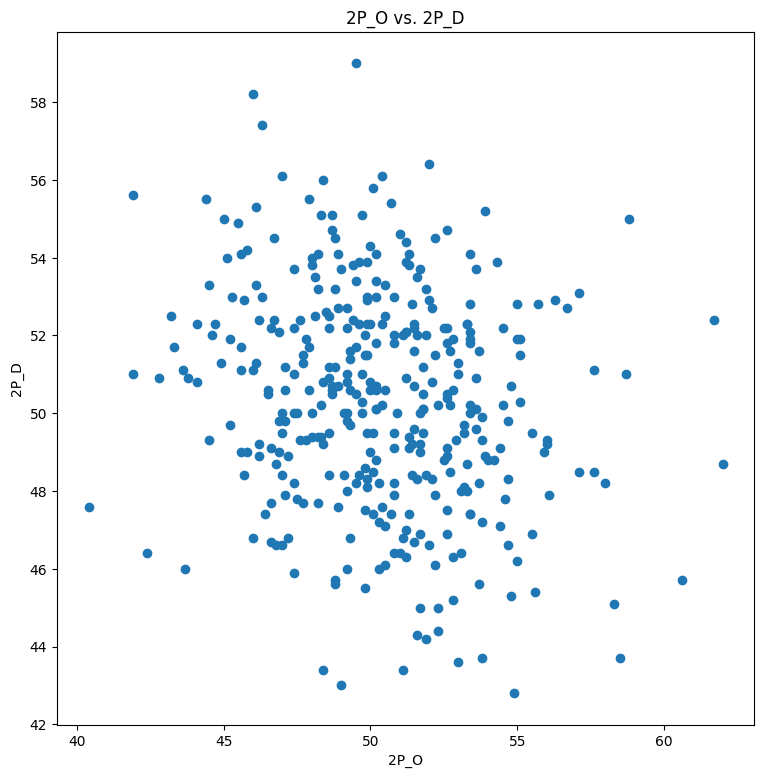

In [145]:
plot_scatter('2P_O', '2P_D')

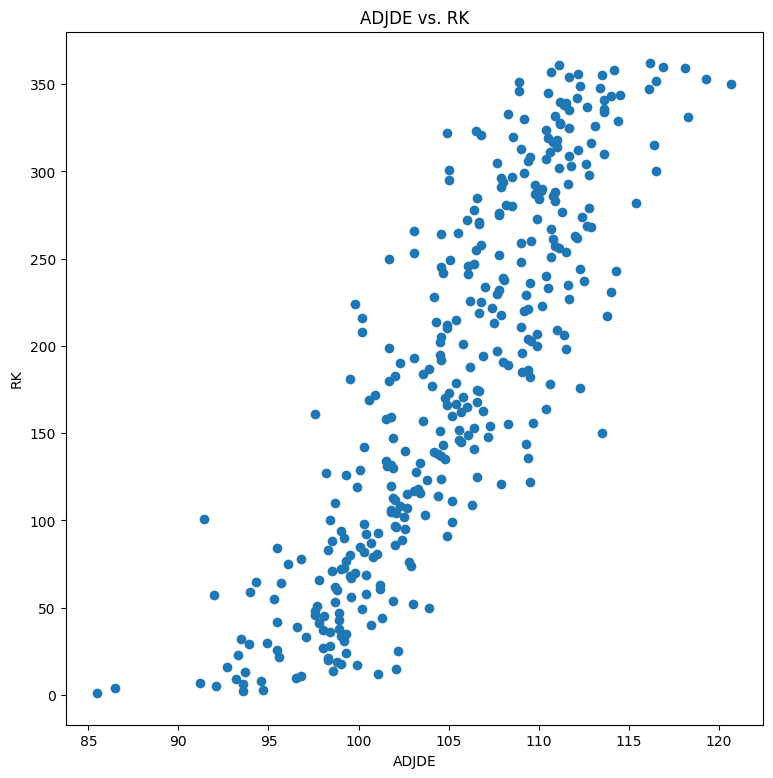

In [146]:
plot_scatter('ADJDE', 'RK')

### Linear Regression (from scratch!)

Now it's time to determine the line that best summarizes the relationship between two variables. **Recall that the linear regression line is the best (linear) fit for the data because the line minimizes the squared error between itself and the data points.**

We'll implement linear regression (with no intercept) in two steps:

1. First, complete the function `mse` to calculate the mean squared error (MSE) between the line $y = mx$ and the data (x, y).
2. Then, use iterative optimization in creating the `minimize_mse` function to select the candidate value from a list of `candidates` that minimizes the `mse` function.

_Hint: for loops will come in handy in both steps!_

In [147]:
def mse(m, x, y):
    """
    mse takes in a slope (M) and the data points (X, Y).

    The function should return the mean squared error between
    the points and the regression line y = mx
    """

    # Hints:
    # 1. Calculate the residuals
    # 2. Square the residuals
    # 3. Sum the residuals
    # 4. Divide by the number of data points

    return  # RMSE value

In [148]:
def minimize_mse(candidates, x, y):
    """
    minimize takes a list of candidate
    values (CANDIDATES) for optimization,
    and the data points (X, Y).

    The function should return the value of the
    candidate that minimizes the MSE on the data.
    """

    # YOUR CODE HERE

    # Hint: you'll want to check every candidate
    # to see if it's better than the last.

    return 0 # best candidate

#### Testing Your Work

The helper function below will take in the names of two columns in the `cbb_teams` table, standardize each array, and then use your `minimize_mse` function to find the best slope for the regression line. If you've implemented `mse` and `minimize_mse` correctly, then the optimized regression line will appear along with the scatter plot of the data.

In [149]:
# Just run me!
def optimize(x_col, y_col):

    x_raw = cbb_teams[x_col]
    y_raw = cbb_teams[y_col]

    x = (x_raw - np.mean(x_raw)) / np.std(x_raw)
    y = (y_raw - np.mean(y_raw)) / np.std(y_raw)

    candidates = np.arange(-5, 5, 0.2)

    m = minimize_mse(candidates, x, y)

    plot_scatter(x, y, m = m, x_name = x_col, y_name = y_col)

    print("Best Slope:", round(m, 2))
    print("Best MSE:", mse(m, x, y))

    return

Call the `optimize` function to run the linear regression process on two columns in the `cbb_teams` table.

Best Slope: 0
Best MSE: None


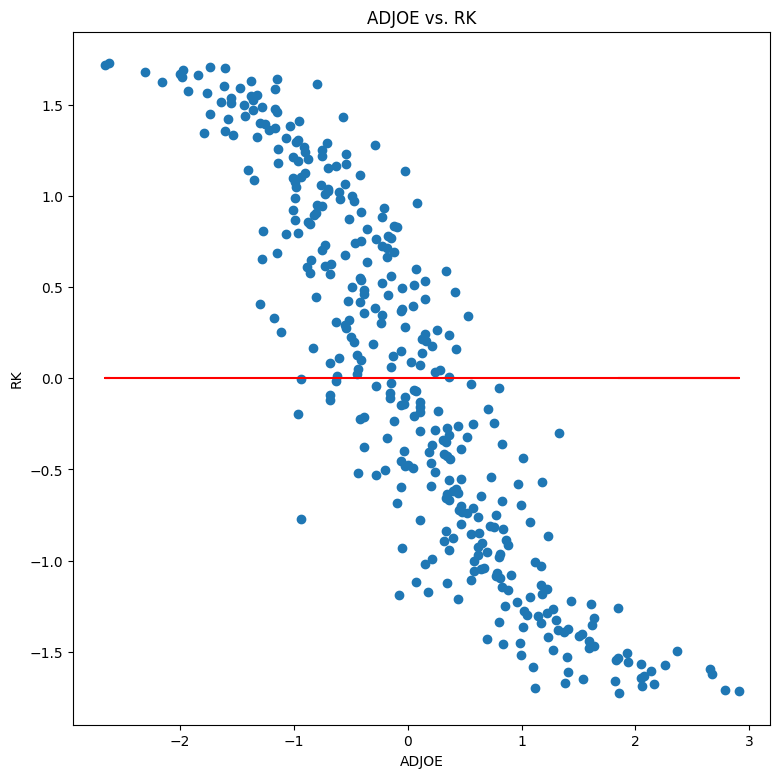

In [150]:
optimize('ADJOE', 'RK')